In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
df = pd.read_csv("sample_data.csv") 

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%Y %H:%M")

In [8]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Values'] < (Q1 - 1.5 * IQR)) | (df['Values'] > (Q3 + 1.5 * IQR)))]

In [9]:
min_val = df['Values'].min()
max_val = df['Values'].max()
avg_val = df['Values'].mean()

print(f"Minimum: {min_val}")
print(f"Maximum: {max_val}")
print(f"Average: {avg_val:.2f}")

Minimum: 25
Maximum: 100
Average: 67.33


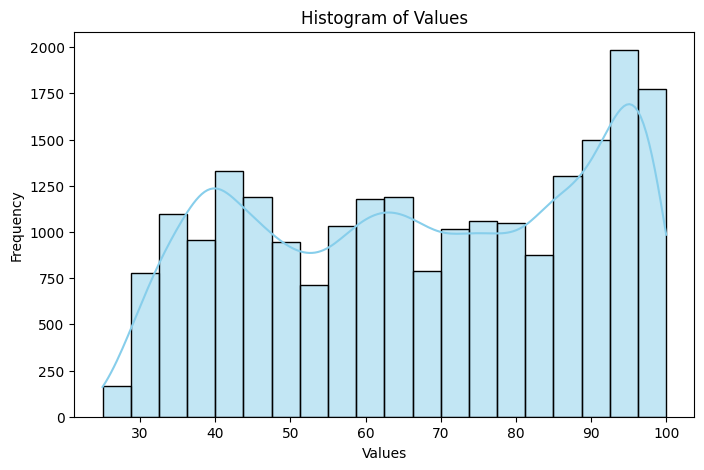

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Values'], bins=20, kde=True, color='skyblue')
plt.title("Histogram of Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()


In [11]:
df_12 = df[df['Timestamp'].dt.day == 12]

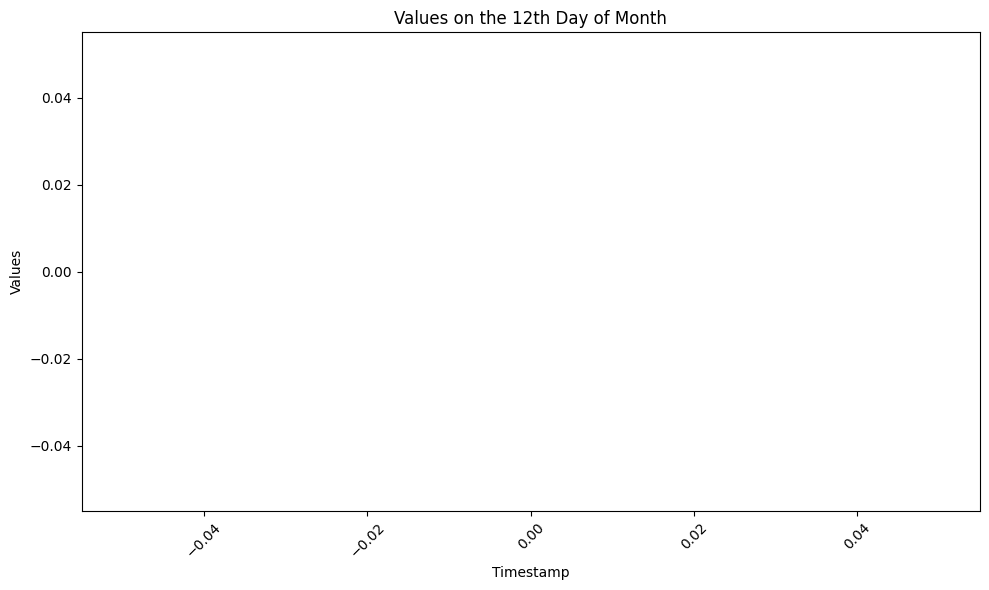

In [12]:
colors = ['red' if v < avg_val else 'green' for v in df_12['Values']]

plt.figure(figsize=(10,6))
plt.bar(df_12['Timestamp'].dt.strftime("%Y-%m-%d %H:%M"), df_12['Values'], color=colors)
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.title("Values on the 12th Day of Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
